<a href="https://colab.research.google.com/github/SthiraPs/ML-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

Lets insert the data set and assign is as a data frame called df1

In [2]:
df1 = pd.read_excel ("New Dataset.xlsx")
df1.head()

,Location,Year,Price Per Perch
0,Colombo 1,2015.0,11187000
1,Colombo 1,2016.0,12187000
2,Colombo 1,2017.0,13395000
3,Colombo 1,2018.0,14550000
4,Colombo 1,2019.0,15995000


In [3]:
df1.shape

(120, 3)

In [4]:
df1.groupby('Location')['Location'].agg('count')

Location
Colombo 1     9
Colombo 10    8
Colombo 11    8
Colombo 12    8
Colombo 13    8
Colombo 14    8
Colombo 15    8
Colombo 2     7
Colombo 3     8
Colombo 4     8
Colombo 5     8
Colombo 6     8
Colombo 7     8
Colombo 8     8
Colombo 9     8
Name: Location, dtype: int64

In [5]:
df1.groupby('Year')['Year'].agg('count')

Year
2014.0    10
2015.0    15
2016.0    15
2017.0    15
2018.0    16
2019.0    15
2020.0    15
2021.0    15
Name: Year, dtype: int64

Lets check whether there are any null values in the dataset

In [6]:
df1.isnull().sum()

Location            0
Year                4
Price Per Perch    18
dtype: int64

In [7]:
df1.shape

(120, 3)

There are 4 null values in Year column and 18 in Price Per Perch column.  Lets remove these values

In [8]:
df2 = df1.dropna()
df2.isnull().sum()

Location           0
Year               0
Price Per Perch    0
dtype: int64

In [9]:
df2.shape

(102, 3)

In this DataFrame years have been stored as float values. Lets change it into int

In [10]:
df2.Year = df2.Year.astype(int)
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Location,Year,Price Per Perch
0,Colombo 1,2015,11187000
1,Colombo 1,2016,12187000
2,Colombo 1,2017,13395000
3,Colombo 1,2018,14550000
4,Colombo 1,2019,15995000


In [11]:
df2['Location'].unique()

array(['Colombo 1', 'Colombo 2', 'Colombo 3', 'Colombo 4', 'Colombo 5',
       'Colombo 6', 'Colombo 7', 'Colombo 8', 'Colombo 9', 'Colombo 10',
       'Colombo 12', 'Colombo 13', 'Colombo 14', 'Colombo 15'],
      dtype=object)

Lets encode these string values in the Location column into int values and store them in a new column called New_Location

In [12]:
df2['New_Location'] = df2['Location'].apply(lambda x: int(x.split(' ')[1]))
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Location,Year,Price Per Perch,New_Location
0,Colombo 1,2015,11187000,1
1,Colombo 1,2016,12187000,1
2,Colombo 1,2017,13395000,1
3,Colombo 1,2018,14550000,1
4,Colombo 1,2019,15995000,1


In [13]:
df2.head(10)

,Location,Year,Price Per Perch,New_Location
0,Colombo 1,2015,11187000,1
1,Colombo 1,2016,12187000,1
2,Colombo 1,2017,13395000,1
3,Colombo 1,2018,14550000,1
4,Colombo 1,2019,15995000,1
5,Colombo 1,2020,17350000,1
6,Colombo 1,2021,19250000,1
7,Colombo 1,2018,21100000,1
8,Colombo 1,2014,21100000,1
9,Colombo 2,2015,9650000,2


In [14]:
df2['New_Location'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15])

In [15]:
df2.loc[22]

Location           Colombo 3
Year                    2020
Price Per Perch     15699000
New_Location               3
Name: 22, dtype: object

In [16]:
df2 = df2.rename(columns = {'Price Per Perch': 'Price_Per_Perch', 'value': 'Income'}, inplace = False)
df2.head(1)

,Location,Year,Price_Per_Perch,New_Location
0,Colombo 1,2015,11187000,1


In [17]:
df2.head(108)

,Location,Year,Price_Per_Perch,New_Location
0,Colombo 1,2015,11187000,1
1,Colombo 1,2016,12187000,1
2,Colombo 1,2017,13395000,1
3,Colombo 1,2018,14550000,1
4,Colombo 1,2019,15995000,1
...,...,...,...,...
115,Colombo 15,2017,1198000 - 1219000,15
116,Colombo 15,2018,1310000,15
117,Colombo 15,2019,1598000,15
118,Colombo 15,2020,1780000,15


As it show in the above table, there are some prices in range.(115th row). Lets convert these values into single value

First of all lets find out the values that have stored as a range in the Price_Per_Perch column

In [18]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [19]:
df2[~df2['Price_Per_Perch'].apply(is_float)].head()

,Location,Year,Price_Per_Perch,New_Location
65,Colombo 9,2015,4435000 - 4690000,9
68,Colombo 9,2018,6200000 - 6360000,9
115,Colombo 15,2017,1198000 - 1219000,15


In [20]:
def convert_price_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [21]:
convert_price_to_num('10-89')

49.5

In [22]:
df2.Price_Per_Perch = df2.Price_Per_Perch.astype(str)

In [23]:
df2.shape

(102, 4)

In [24]:
df3 = df2.copy()
df3['Price_Per_Perch'] = df3['Price_Per_Perch'].apply(convert_price_to_num)
df3.head()

,Location,Year,Price_Per_Perch,New_Location
0,Colombo 1,2015,11187000.0,1
1,Colombo 1,2016,12187000.0,1
2,Colombo 1,2017,13395000.0,1
3,Colombo 1,2018,14550000.0,1
4,Colombo 1,2019,15995000.0,1


In [25]:
df3.shape

(102, 4)

In [26]:
df3[~df3['Price_Per_Perch'].apply(is_float)].head()

,Location,Year,Price_Per_Perch,New_Location


In [27]:
dummies = pd.get_dummies(df3.Location)
dummies.head(10)

,Colombo 1,Colombo 10,Colombo 12,Colombo 13,Colombo 14,Colombo 15,Colombo 2,Colombo 3,Colombo 4,Colombo 5,Colombo 6,Colombo 7,Colombo 8,Colombo 9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
df4 = pd.concat([df3,dummies],axis='columns')
df4.head()


,Location,Year,Price_Per_Perch,New_Location,Colombo 1,Colombo 10,Colombo 12,Colombo 13,Colombo 14,Colombo 15,Colombo 2,Colombo 3,Colombo 4,Colombo 5,Colombo 6,Colombo 7,Colombo 8,Colombo 9
0,Colombo 1,2015,11187000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Colombo 1,2016,12187000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Colombo 1,2017,13395000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Colombo 1,2018,14550000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Colombo 1,2019,15995000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df4.shape

(102, 18)

Since now have locations as seperate columns in the table, we can remove the Location column from the dataset

In [30]:
df5 = df4.drop('Location', axis='columns')
df5.head()

,Year,Price_Per_Perch,New_Location,Colombo 1,Colombo 10,Colombo 12,Colombo 13,Colombo 14,Colombo 15,Colombo 2,Colombo 3,Colombo 4,Colombo 5,Colombo 6,Colombo 7,Colombo 8,Colombo 9
0,2015,11187000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016,12187000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,13395000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,14550000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019,15995000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df5.shape

(102, 17)

In [32]:
df_graph = df3.loc[df5['New_Location'] == 1]
df_graph.head()

,Location,Year,Price_Per_Perch,New_Location
0,Colombo 1,2015,11187000.0,1
1,Colombo 1,2016,12187000.0,1
2,Colombo 1,2017,13395000.0,1
3,Colombo 1,2018,14550000.0,1
4,Colombo 1,2019,15995000.0,1


Change of the land prices with the time

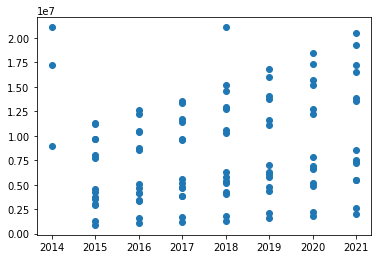

In [33]:
plt.scatter(df3.Year, df5.Price_Per_Perch)
plt.show()


Scatter plot of the price over year in Colombo 1

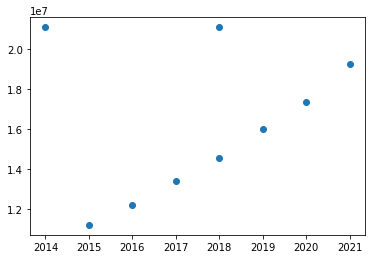

In [34]:
plt.scatter(df_graph.Year, df_graph.Price_Per_Perch)
plt.show()


As above graph shows, there are some outliers and wrong inputs in the dataset. We should remove them

In [35]:
df3.head(10)

,Location,Year,Price_Per_Perch,New_Location
0,Colombo 1,2015,11187000.0,1
1,Colombo 1,2016,12187000.0,1
2,Colombo 1,2017,13395000.0,1
3,Colombo 1,2018,14550000.0,1
4,Colombo 1,2019,15995000.0,1
5,Colombo 1,2020,17350000.0,1
6,Colombo 1,2021,19250000.0,1
7,Colombo 1,2018,21100000.0,1
8,Colombo 1,2014,21100000.0,1
9,Colombo 2,2015,9650000.0,2


In [36]:
df5 = df5.drop(df5.index[7])

In [37]:
df4 = df4.drop(df4.index[7])

In [38]:
df5.shape

(101, 17)

<Figure size 1440x720 with 0 Axes>

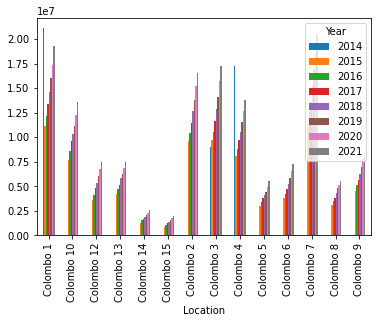

<Figure size 1440x720 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt

df4.pivot(index= 'Location', columns= 'Year', values='Price_Per_Perch').plot(kind='bar')
plt.figure(figsize=(20,10))

According to the above bar char, Colombo 1 and Colombo 4 have some outliers in Year 2014. We should remove  those outliers in order to get a better output

In [40]:
df5.head(30)

,Year,Price_Per_Perch,New_Location,Colombo 1,Colombo 10,Colombo 12,Colombo 13,Colombo 14,Colombo 15,Colombo 2,Colombo 3,Colombo 4,Colombo 5,Colombo 6,Colombo 7,Colombo 8,Colombo 9
0,2015,11187000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016,12187000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017,13395000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,14550000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019,15995000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020,17350000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2021,19250000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2014,21100000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2015,9650000.0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10,2016,10410000.0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
i1 = df5.index[(df5['Year']==2014) & (df5['New_Location']==1)]
i2 = df5.index[(df5['Year']==2014) & (df5['New_Location']==4)]

print(i2)

Int64Index([24], dtype='int64')


In [42]:
i1.shape

(1,)

In [43]:
df6 = df5.drop(i1)

In [44]:
df7 = df6.drop(i2)

In [45]:
df7.shape

(99, 17)

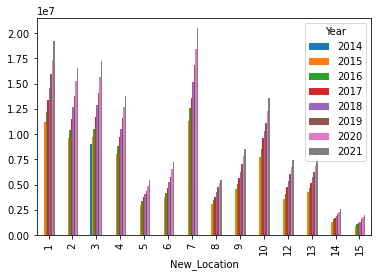

In [46]:
import matplotlib.pyplot as plt

df7.pivot(index= 'New_Location', columns= 'Year', values='Price_Per_Perch').plot(kind='bar')

**********Lets build Linear Regression Model and Decision Tree Model**************

Lets divide the dataset into acording to the dependency (Independent - Locaction,Year/ Dependent - Price)

In [47]:
def Main_Function(Location, Year):

  L1 = Location
  L2 = (L1[8:10])

  #Now to build a model, lets split the dataset according to the location

  df = df7.loc[df7['New_Location'] == int(L2)]

  X = df.drop('Price_Per_Perch',axis='columns') 
  y = df.Price_Per_Perch

  #Creating Training and testing data sets

  from sklearn.model_selection import train_test_split
  x_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

  #Linear Riggression Model

  from sklearn.linear_model import LinearRegression
  lr_clf = LinearRegression()
  lr_clf.fit(x_train,y_train)  #Fitting the model
  lr_clf.score(X_test,y_test)  #Score of the test

  #Decision Tree Model

  from sklearn.tree import DecisionTreeRegressor
  dt_clf = DecisionTreeRegressor()
  dt_clf.fit(x_train,y_train)  #Fitting the model
  dt_clf.score(X_test,y_test)  #Score of the test

  #Polynomial Regression Model (Not working)

  #from sklearn.preprocessing import PolynomialFeatures
  #poly_reg = PolynomialFeatures(degree=2)
  #X_poly = poly_reg.fit_transform(x_train)
  #pol_reg = LinearRegression()
  #pol_reg.fit(X_poly,y_train)
  #pol_reg.score(X_test,y_test)             #Score of the test
  #return pol_reg.predict([x])[0]           #Score of the test -> polinamial



  #Price predicting function

  loc_index = np.where(X.columns==Location)[0][0]
  x = np.zeros(len(X.columns))
  x[0] = Year
  
  if loc_index >= 0:
    x[loc_index] = 1



        ####################################################   Outputs   ################################################



  print('Linear Regression Model Score                : ' , lr_clf.score(X_test,y_test))      #This will return the score of the Linear Reggresion Model
  print('Decision Tree Model Score                    : ' , dt_clf.score(X_test,y_test))       #This will return the score of the Decision Tree Reggresion Model
  print('Predicted Price by Linear Reggression Model  : ' , lr_clf.predict([x])[0])              #This will return the predicted price according to the location and year that entered
  print('Predicted Price by Decision Tree Model       : ' , dt_clf.predict([x])[0])              #This will return the predicted price according to the location and year that entered

  plt.scatter(df['Year'],df['Price_Per_Perch'],label='LLLLL')
  m, b = np.polyfit(df['Year'],df['Price_Per_Perch'], 1)
  plt.plot(df['Year'],m*df['Year'] + b , color='red')
  print('Slope of the fit line                        : ' , m)

  plt.title(L1)
  plt.xlabel("Year")
  plt.ylabel("Price Per Perch")

  #However according to the score of the above two models we can clearly see the Lineara Reggresion model performs well compared to the decision tree model
 


  #Price increment of the land price

  years = Year - 2021
  if years > 0:
    price1 = df['Price_Per_Perch'][df['Year']==2021]
    price2 = lr_clf.predict([x])[0]
    increment = (price2 - price1)*100/price1
    print(int(increment),'% increment of the land price in', years,'years')
  else:
    print('Invalid Input')

Linear Regression Model Score                :  0.9844919482912488
Decision Tree Model Score                    :  0.785728080018184
Predicted Price by Linear Reggression Model  :  16118511.6279068
Predicted Price by Decision Tree Model       :  15214000.0
Slope of the fit line                        :  1159249.9999999972
Invalid Input


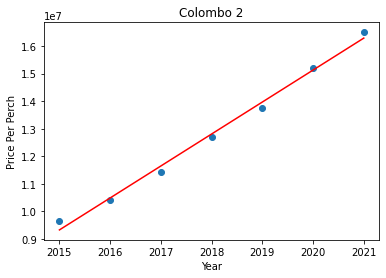

In [48]:
Main_Function('Colombo 2',2021) #Enter a Location(Colombo 1, Colombo 2...) and a Year(2020,2021...) here. (ex: 'Colombo 7',2025)